# Cobify technical challenge

**Ainara Guerra Fernández**

# <span style="color:#FF33A8"> C. Predictions

## C. 1. Do you have any hypothesis?

My hypothesis is that with the data that we have, the gas type doesn't influence so much the performance of the trip as the special situations.

That's why I am going to create a model and include also the special situations, apart from the distance, temperature of the following days and average speed the driver is going to take.

Myy question is to decide whether I put specials column or AC, rain and sun columns.

## C. 2. Can you make any kind of prediction: regression and/or classification?

### Our model is going to be a classification. With the conditions that the driver input for his or her next trip, the streamlit app will recommend which gas type should he use.

### First we run a basic model

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("cleaned_data.xlsx")

In [5]:
data.head()

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0
1,1,12.0,4.2,30,21.5,13,no specials,E10,0,0,0
2,2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0
3,3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0
4,4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0


In [6]:
# split the data
X = data.drop("gas_type", axis=1)  # Features
y = data["gas_type"]  # Target

In [9]:
X = X.drop("Unnamed: 0", axis=1)

In [12]:
X = X.drop(["AC", "rain", "sun"], axis=1)

In [13]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=["specials"])

In [14]:
X_encoded

,distance,consume,speed,temp_inside,temp_outside,specials_AC,specials_AC Sun,specials_AC rain,specials_AC snow,specials_half rain half sun,specials_no specials,specials_rain,specials_snow,specials_sun
0,28.0,5.0,26,21.5,12,False,False,False,False,False,True,False,False,False
1,12.0,4.2,30,21.5,13,False,False,False,False,False,True,False,False,False
2,11.2,5.5,38,21.5,15,False,False,False,False,False,True,False,False,False
3,12.9,3.9,36,21.5,14,False,False,False,False,False,True,False,False,False
4,18.5,4.5,46,21.5,15,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,16.0,3.7,39,24.5,18,False,False,False,False,False,True,False,False,False
772,16.1,4.3,38,25.0,31,True,False,False,False,False,False,False,False,False
773,16.0,3.8,45,25.0,19,False,False,False,False,False,True,False,False,False
774,15.4,4.6,42,25.0,31,True,False,False,False,False,False,False,False,False


Accuracy: 0.9358974358974359
              precision    recall  f1-score   support

         E10       0.92      0.89      0.91        55
        SP98       0.94      0.96      0.95       101

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



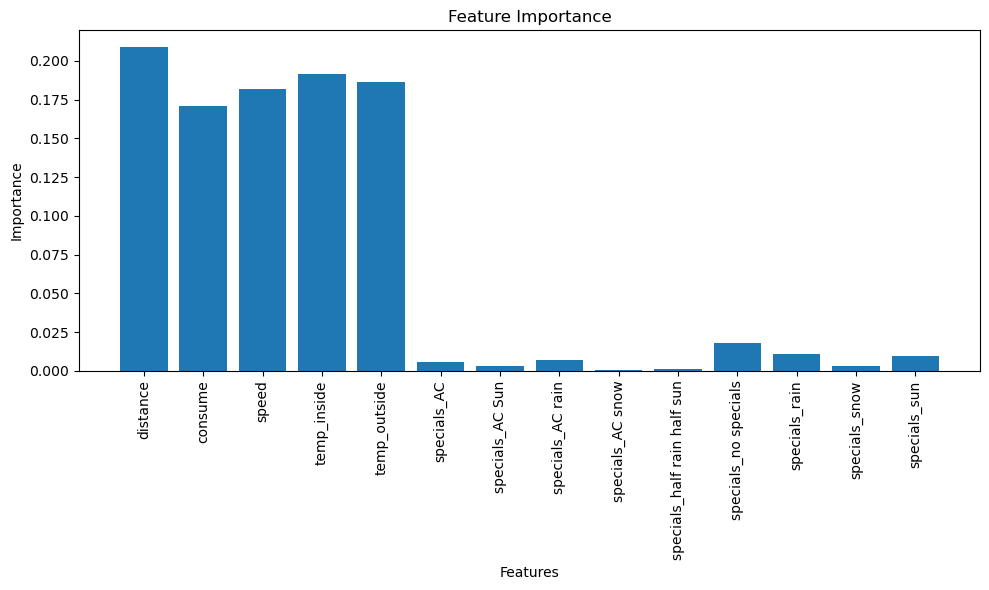

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict gas_type on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X_encoded.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


### Let's encode specials column in another way and repeat everything because with that encoding our streamlit app won't run afterwards.


In [16]:

map_specials = {
    'no specials': 0, 
    'AC rain' : 1, 
    'AC': 2,
    'rain': 3,
    'snow' : 4,
    'AC snow' : 5,
    'half rain half sun' : 6,
    'sun' : 7,
    'AC Sun' : 8
}

map_gas = {
    
    'SP98' : 0,
    'E10' : 1
}

data['specials_enc'] = data['specials'].map(map_specials)
data['gas_enc'] = data['gas_type'].map(map_gas)

In [17]:
data

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc
0,0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0,0,1
1,1,12.0,4.2,30,21.5,13,no specials,E10,0,0,0,0,1
2,2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0,0,1
3,3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0,0,1
4,4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,383,16.0,3.7,39,24.5,18,no specials,SP98,0,0,0,0,0
772,384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,2,0
773,385,16.0,3.8,45,25.0,19,no specials,SP98,0,0,0,0,0
774,386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,2,0


In [19]:
# split the data
X = data.drop("gas_type", axis=1)  # Features
y = data["gas_type"]  # Target

In [20]:
X = X.drop(["Unnamed: 0", "AC", "rain", "sun"], axis=1)

In [23]:
X = X.drop("specials", axis=1)

In [26]:
X = X.drop("gas_enc", axis=1)

In [27]:
X

,distance,consume,speed,temp_inside,temp_outside,specials_enc
0,28.0,5.0,26,21.5,12,0
1,12.0,4.2,30,21.5,13,0
2,11.2,5.5,38,21.5,15,0
3,12.9,3.9,36,21.5,14,0
4,18.5,4.5,46,21.5,15,0
...,...,...,...,...,...,...
771,16.0,3.7,39,24.5,18,0
772,16.1,4.3,38,25.0,31,2
773,16.0,3.8,45,25.0,19,0
774,15.4,4.6,42,25.0,31,2


In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict gas_type on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

         E10       0.89      0.89      0.89        55
        SP98       0.94      0.94      0.94       101

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



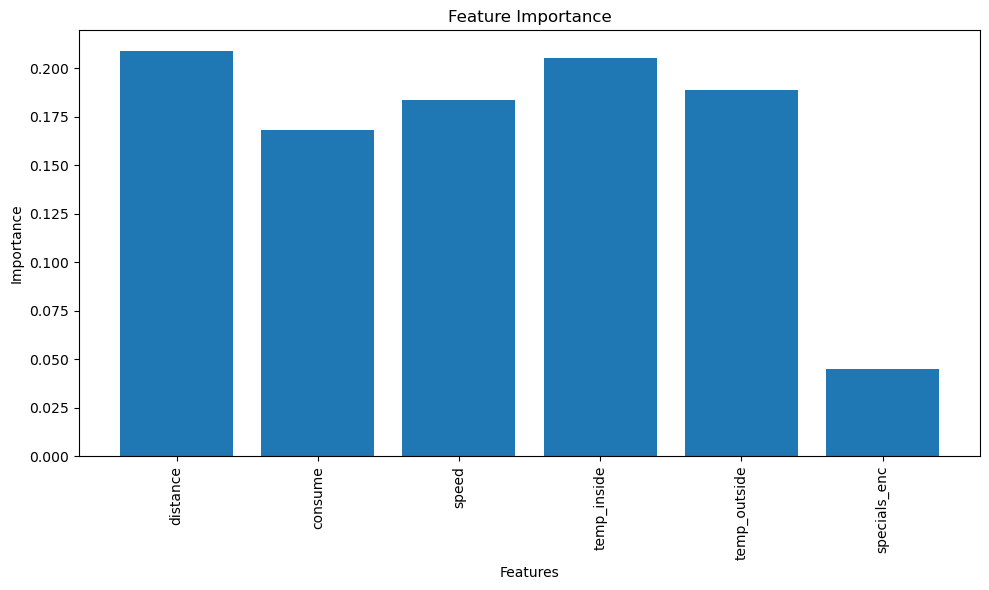

In [31]:
# Feature Importance Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


### Now we are going to try with rain, AC and sun, but no specials because they are correlated

In [32]:
data_num = data.copy()

In [33]:
data_num.head()

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc
0,0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0,0,1
1,1,12.0,4.2,30,21.5,13,no specials,E10,0,0,0,0,1
2,2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0,0,1
3,3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0,0,1
4,4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0,0,1


In [35]:
data_num = data_num.drop(columns=["Unnamed: 0", "specials"], axis=1)

In [38]:
data_num = data_num.drop("gas_type", axis=1)

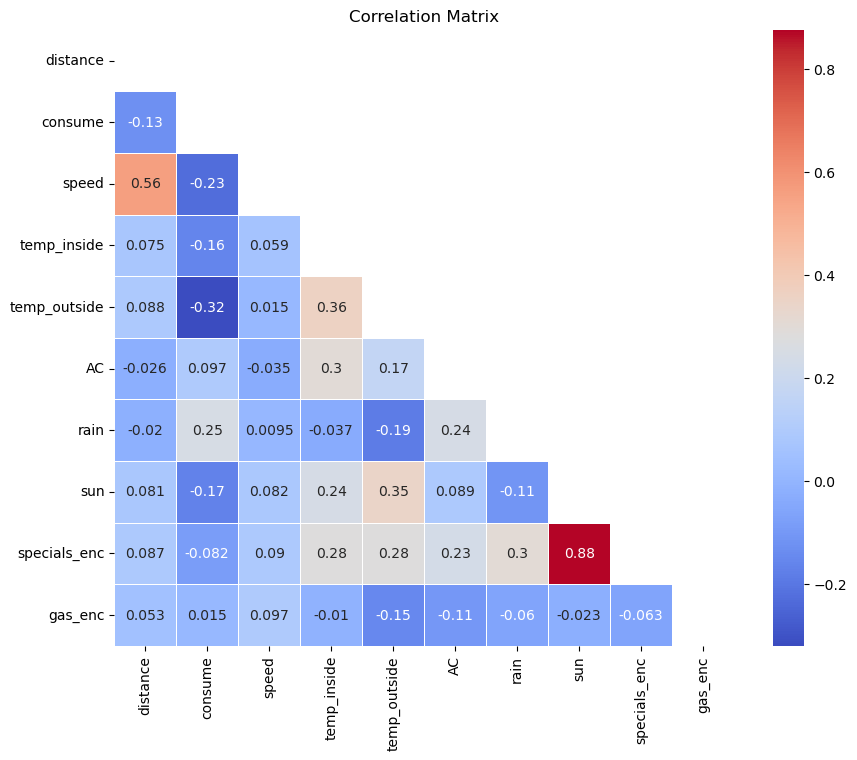

In [41]:
correlation_matrix = data_num.corr()
mask = np.triu(correlation_matrix) # let's display only half so it is not repeated.b
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, mask=mask)
plt.title("Correlation Matrix")
plt.show()

In [42]:
# here we see the high correlation between specials_enc and sun

In [44]:
# split the data
X = data_num.drop("gas_enc", axis=1)  # Features
y = data["gas_type"]  # Target

In [48]:
X = X.drop("specials_enc", axis=1)

In [49]:
X

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
771,16.0,3.7,39,24.5,18,0,0,0
772,16.1,4.3,38,25.0,31,1,0,0
773,16.0,3.8,45,25.0,19,0,0,0
774,15.4,4.6,42,25.0,31,1,0,0


In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict gas_type on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

         E10       0.89      0.89      0.89        55
        SP98       0.94      0.94      0.94       101

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



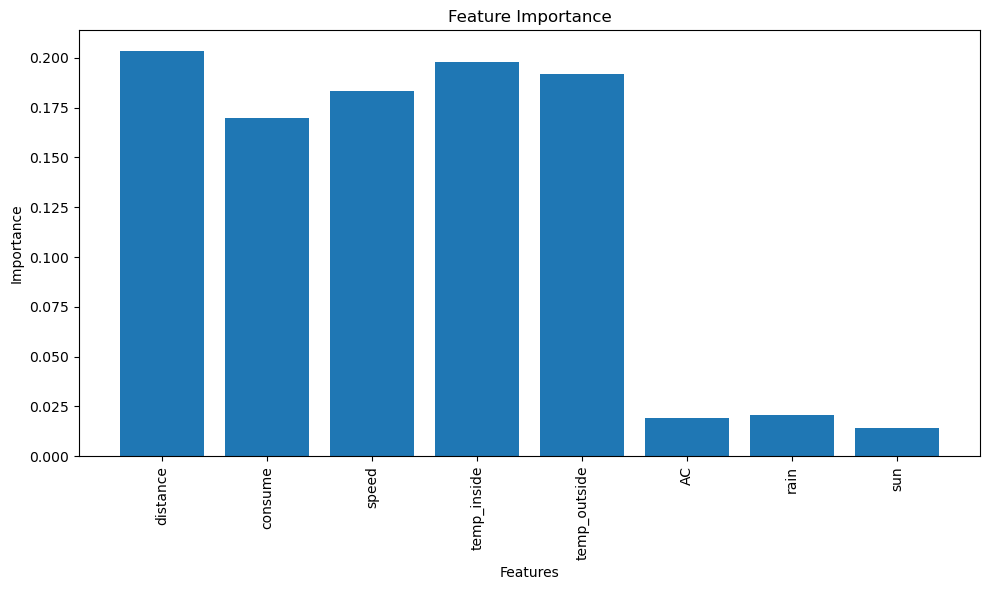

In [51]:
# Feature Importance Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


### The final model will be with specials column proccesed with feature engineering because the information in this column and in AC, rain and sun columns are almost repeated. 

In [52]:
data["specials"].value_counts()

specials
no specials           590
rain                   64
sun                    54
AC                     28
AC rain                20
AC Sun                 10
snow                    6
AC snow                 2
half rain half sun      2
Name: count, dtype: int64

In [54]:
AC_sun = data[data['specials'] == 'AC Sun']
AC_sun

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc
273,273,93.9,4.8,88,23.0,18,AC Sun,E10,1,0,1,8,1
299,299,18.7,4.2,65,25.0,18,AC Sun,SP98,1,0,1,8,0
301,301,19.0,5.0,35,22.0,15,AC Sun,SP98,1,0,1,8,0
331,331,21.5,4.8,47,25.0,27,AC Sun,E10,1,0,1,8,1
366,366,16.6,4.1,48,25.5,30,AC Sun,SP98,1,0,1,8,0
661,273,93.9,4.8,88,23.0,18,AC Sun,E10,1,0,1,8,1
687,299,18.7,4.2,65,25.0,18,AC Sun,SP98,1,0,1,8,0
689,301,19.0,5.0,35,22.0,15,AC Sun,SP98,1,0,1,8,0
719,331,21.5,4.8,47,25.0,27,AC Sun,E10,1,0,1,8,1
754,366,16.6,4.1,48,25.5,30,AC Sun,SP98,1,0,1,8,0


In [55]:
AC_snow = data[data['specials'] == 'AC snow']
AC_snow

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc
181,181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,5,1
569,181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,5,1


In [56]:
half = data[data['specials'] == 'half rain half sun']
half

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc
191,191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,6,0
579,191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,6,0


In [57]:
# As we see column in specials and in AC, rain, sun is repeated. The only one that is new is snow, so we are going to create a column for that and not use specials

def is_snow(row):
    if "snow" in row["specials"] or "AC snow" in row["specials"]:
        return 1
    else:
        return 0

# Apply the function to create the "snow" column
data["snow"] = data.apply(is_snow, axis=1)

In [58]:
data

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,specials_enc,gas_enc,snow
0,0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0,0,1,0
1,1,12.0,4.2,30,21.5,13,no specials,E10,0,0,0,0,1,0
2,2,11.2,5.5,38,21.5,15,no specials,E10,0,0,0,0,1,0
3,3,12.9,3.9,36,21.5,14,no specials,E10,0,0,0,0,1,0
4,4,18.5,4.5,46,21.5,15,no specials,E10,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,383,16.0,3.7,39,24.5,18,no specials,SP98,0,0,0,0,0,0
772,384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,2,0,0
773,385,16.0,3.8,45,25.0,19,no specials,SP98,0,0,0,0,0,0
774,386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,2,0,0


In [61]:
for_model = data.drop(columns=["specials", "specials_enc"], axis=1)
for_model

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_enc,snow
0,0,28.0,5.0,26,21.5,12,E10,0,0,0,1,0
1,1,12.0,4.2,30,21.5,13,E10,0,0,0,1,0
2,2,11.2,5.5,38,21.5,15,E10,0,0,0,1,0
3,3,12.9,3.9,36,21.5,14,E10,0,0,0,1,0
4,4,18.5,4.5,46,21.5,15,E10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
771,383,16.0,3.7,39,24.5,18,SP98,0,0,0,0,0
772,384,16.1,4.3,38,25.0,31,SP98,1,0,0,0,0
773,385,16.0,3.8,45,25.0,19,SP98,0,0,0,0,0
774,386,15.4,4.6,42,25.0,31,SP98,1,0,0,0,0


In [62]:
for_model = for_model.drop("Unnamed: 0", axis=1)

In [64]:
for_model.to_csv("data_model.csv") # the one that we will use for streamlit

In [66]:
for_model

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_enc,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,1,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,1,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,1,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,1,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
771,16.0,3.7,39,24.5,18,SP98,0,0,0,0,0
772,16.1,4.3,38,25.0,31,SP98,1,0,0,0,0
773,16.0,3.8,45,25.0,19,SP98,0,0,0,0,0
774,15.4,4.6,42,25.0,31,SP98,1,0,0,0,0


In [67]:
# split the data
X = for_model.drop(columns=["gas_enc", "gas_type"], axis=1)  # Features
y = data["gas_type"]  # Target

In [68]:
X

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
771,16.0,3.7,39,24.5,18,0,0,0,0
772,16.1,4.3,38,25.0,31,1,0,0,0
773,16.0,3.8,45,25.0,19,0,0,0,0
774,15.4,4.6,42,25.0,31,1,0,0,0


In [69]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict gas_type on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9358974358974359
              precision    recall  f1-score   support

         E10       0.92      0.89      0.91        55
        SP98       0.94      0.96      0.95       101

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



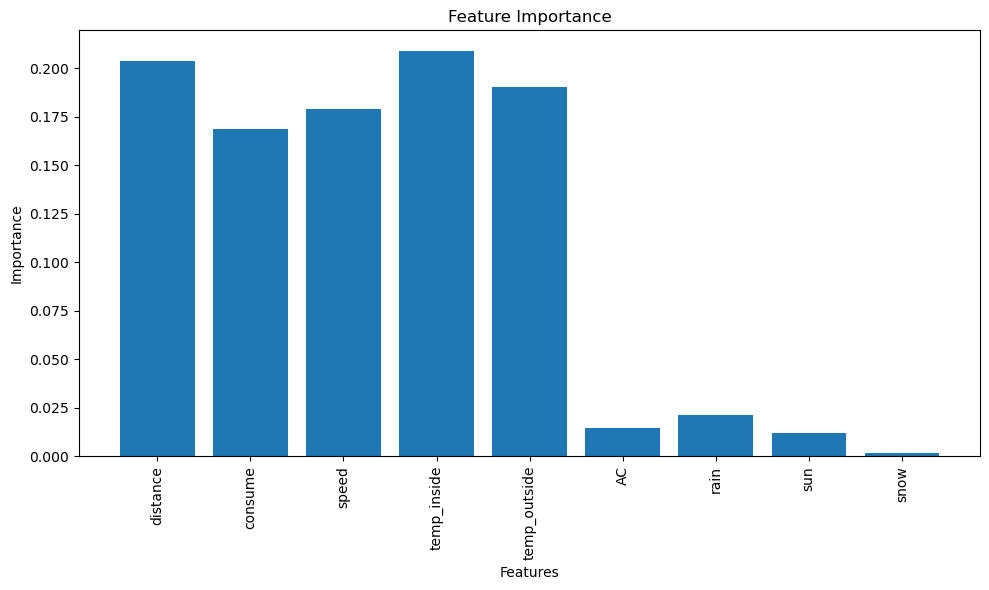

In [70]:
# Feature Importance Plot
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [71]:
# In a real scenario I will try different models and further feature engineering. But the metrics that are showing are ok for a first MVP.
# Due to the limit time since this is a challenge, I will go for this model for the streamlit app. 